# Loan200

In [43]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

In [4]:
df_loan200 = pd.read_csv('../input/loan200.csv')
df_loan200.head()

,outcome,payment_inc_ratio,dti
0,target,9.00000,22.50
1,default,5.46933,21.33
2,paid off,6.90294,8.97
3,paid off,11.14800,1.83
4,default,3.72120,10.81


In [5]:
df_loan200.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 3 columns):
outcome              201 non-null object
payment_inc_ratio    201 non-null float64
dti                  201 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [8]:
df_loan200['outcome'].value_counts()

paid off    104
default      96
target        1
Name: outcome, dtype: int64

## KNN

In [12]:
X = df_loan200.iloc[1:][['payment_inc_ratio', 'dti']].values
X

array([[ 5.46933 , 21.33    ],
       [ 6.90294 ,  8.97    ],
       [11.148   ,  1.83    ],
       [ 3.7212  , 10.81    ],
       [ 1.89923 , 11.34    ],
       [ 2.78485 , 16.      ],
       [13.8562  , 11.24    ],
       [11.6848  , 27.78    ],
       [ 9.43396 , 24.15    ],
       [ 1.62408 ,  7.66    ],
       [ 5.1505  , 23.81    ],
       [10.7316  , 11.46    ],
       [ 5.48028 ,  3.05    ],
       [ 9.1232  , 16.21    ],
       [ 8.87467 , 28.06    ],
       [ 8.35831 ,  7.15    ],
       [18.4205  , 27.65    ],
       [ 6.72874 , 16.3     ],
       [ 5.92267 , 18.11    ],
       [ 3.34661 , 12.16    ],
       [ 6.91886 , 22.47    ],
       [13.2091  , 12.      ],
       [12.5258  , 23.19    ],
       [ 5.02149 , 18.93    ],
       [ 7.43493 , 15.8     ],
       [14.3348  , 33.17    ],
       [ 3.40145 ,  8.49    ],
       [19.5196  , 19.42    ],
       [16.4191  , 26.08    ],
       [ 7.12971 , 12.17    ],
       [11.8603  , 22.54    ],
       [ 7.311   , 19.13    ],
       [

In [35]:
y = df_loan200.iloc[1:]['outcome'].values
y

array(['default', 'paid off', 'paid off', 'default', 'paid off',
       'default', 'paid off', 'default', 'default', 'paid off', 'default',
       'paid off', 'paid off', 'paid off', 'default', 'paid off',
       'default', 'default', 'paid off', 'paid off', 'default',
       'paid off', 'paid off', 'paid off', 'paid off', 'default',
       'paid off', 'default', 'default', 'default', 'paid off',
       'paid off', 'paid off', 'paid off', 'default', 'paid off',
       'default', 'default', 'paid off', 'default', 'paid off',
       'paid off', 'paid off', 'default', 'default', 'paid off',
       'paid off', 'default', 'paid off', 'default', 'paid off',
       'paid off', 'paid off', 'default', 'paid off', 'paid off',
       'default', 'default', 'default', 'default', 'default', 'default',
       'default', 'default', 'default', 'paid off', 'paid off', 'default',
       'default', 'paid off', 'default', 'paid off', 'paid off',
       'paid off', 'default', 'paid off', 'paid off', 'defaul

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1])

In [79]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

knn = Pipeline(steps=[
    ('std', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=20))
])

knn.fit(X, y)
print('Acc:', accuracy_score(y, knn.predict(X)))
knn.predict_proba([df_loan200.iloc[0][['payment_inc_ratio', 'dti']].values])

Acc: 0.625


array([[0.45, 0.55]])

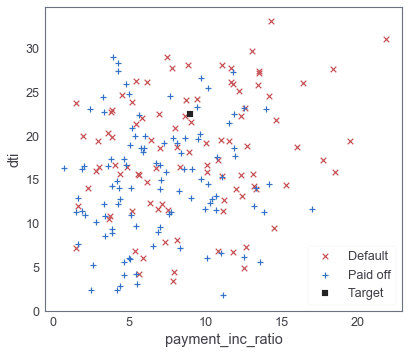

In [65]:
plt.scatter(X[y==0][:,0], X[y==0][:,1], marker='x', color='r', label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], marker='+', color='b', label='Paid off')
plt.scatter(df_loan200.iloc[0]['payment_inc_ratio'],
            df_loan200.iloc[0]['dti'], marker='s', color='k', label='Target')
plt.grid(False)
plt.xlabel('payment_inc_ratio')
plt.ylabel('dti')
plt.legend()

# Loan Data

In [80]:
df_loan = pd.read_csv('../input/loan_data.csv')
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [82]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45342 entries, 0 to 45341
Data columns (total 21 columns):
Unnamed: 0           45342 non-null int64
status               45342 non-null object
loan_amnt            45342 non-null int64
term                 45342 non-null object
annual_inc           45342 non-null int64
dti                  45342 non-null float64
payment_inc_ratio    45342 non-null float64
revol_bal            45342 non-null int64
revol_util           45342 non-null float64
purpose              45342 non-null object
home_ownership       45342 non-null object
delinq_2yrs_zero     45342 non-null int64
pub_rec_zero         45342 non-null int64
open_acc             45342 non-null int64
grade                45342 non-null float64
outcome              45342 non-null object
emp_length           45342 non-null int64
purpose_             45342 non-null object
home_                45342 non-null object
emp_len_             45342 non-null object
borrower_score       45342 non-null

In [86]:
df_loan['outcome'].value_counts()

paid off    22671
default     22671
Name: outcome, dtype: int64

## KNN as a Feature Machine

In [83]:
X = df_loan[['dti', 'revol_bal', 'revol_util', 
             'open_acc', 'delinq_2yrs_zero', 'pub_rec_zero']].values
X

array([[1.0000e+00, 1.6870e+03, 9.4000e+00, 3.0000e+00, 1.0000e+00,
        1.0000e+00],
       [5.5500e+00, 5.2100e+03, 3.2600e+01, 1.1000e+01, 1.0000e+00,
        1.0000e+00],
       [1.8080e+01, 9.2790e+03, 3.6500e+01, 2.0000e+00, 1.0000e+00,
        1.0000e+00],
       ...,
       [7.9500e+00, 6.5740e+03, 7.3000e+01, 8.0000e+00, 1.0000e+00,
        1.0000e+00],
       [2.6910e+01, 1.0303e+04, 3.2400e+01, 1.0000e+01, 1.0000e+00,
        1.0000e+00],
       [7.8200e+00, 1.6676e+04, 9.1600e+01, 1.3000e+01, 0.0000e+00,
        1.0000e+00]])

In [84]:
y = df_loan['outcome'].values
y

array(['default', 'default', 'default', ..., 'paid off', 'paid off',
       'paid off'], dtype=object)

In [85]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [94]:
knn = Pipeline(steps=[
    ('std', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=10))
])

knn.fit(X, y)
print('Acc:', accuracy_score(y, knn.predict(X)))
X_0 = knn.predict_proba(X)[:,0].reshape(-1,1)
X_0

Acc: 0.6733271580433152


array([[0.6],
       [0.4],
       [0.3],
       ...,
       [0.2],
       [0.7],
       [0.3]])

In [93]:
X = np.hstack((X, X_0))
X

array([[1.0000e+00, 1.6870e+03, 9.4000e+00, ..., 1.0000e+00, 1.0000e+00,
        5.0000e-01],
       [5.5500e+00, 5.2100e+03, 3.2600e+01, ..., 1.0000e+00, 1.0000e+00,
        3.0000e-01],
       [1.8080e+01, 9.2790e+03, 3.6500e+01, ..., 1.0000e+00, 1.0000e+00,
        4.0000e-01],
       ...,
       [7.9500e+00, 6.5740e+03, 7.3000e+01, ..., 1.0000e+00, 1.0000e+00,
        5.0000e-01],
       [2.6910e+01, 1.0303e+04, 3.2400e+01, ..., 1.0000e+00, 1.0000e+00,
        7.0000e-01],
       [7.8200e+00, 1.6676e+04, 9.1600e+01, ..., 0.0000e+00, 1.0000e+00,
        5.0000e-01]])

In [98]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression()
logit_reg.fit(X, y)
print('Acc:', accuracy_score(y, logit_reg.predict(X)))

Acc: 0.6460676635349124


## Decision Tree

In [99]:
X = df_loan[['borrower_score', 'payment_inc_ratio']].values
X

array([[ 0.65  ,  2.3932],
       [ 0.8   ,  4.5717],
       [ 0.6   ,  9.716 ],
       ...,
       [ 0.55  ,  9.9846],
       [ 0.65  ,  6.4525],
       [ 0.5   , 11.8715]])

In [101]:
y = df_loan['outcome'].values
y

array(['default', 'default', 'default', ..., 'paid off', 'paid off',
       'paid off'], dtype=object)

In [102]:
le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 0, ..., 1, 1, 1])

In [158]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_impurity_split=0.01)
tree_clf.fit(X, y)
accuracy_score(y, tree_clf.predict(X))

0.6275417934806581

In [159]:
tree_clf.feature_importances_

array([0.73216622, 0.26783378])

(0, 30)

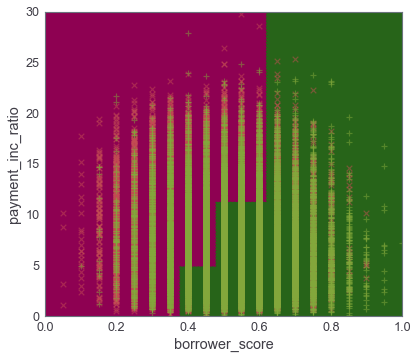

In [160]:
xp, yp = np.linspace(0,1,100), np.linspace(0,30,100)
xv, yv = np.meshgrid(xp, yp)
plt.scatter(xv, yv, c=tree_clf.predict(np.hstack((xv.reshape(-1,1), 
                yv.reshape(-1,1)))).reshape(xv.shape), cmap='PiYG')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='r', marker='x', alpha=0.5, label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='g', marker='+', alpha=0.5, label='Paid off')
plt.grid(False)
plt.title('Decision Tree')
plt.xlabel('borrower_score')
plt.ylabel('payment_inc_ratio')
plt.xlim([0,1])
plt.ylim([0,30])

## Random Forest

In [167]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, max_depth=5)
forest_clf.fit(X, y)
print('Acc:', accuracy_score(y, forest_clf.predict(X)))
forest_clf.feature_importances_

Acc: 0.6311808036698866


array([0.68409441, 0.31590559])

(0, 30)

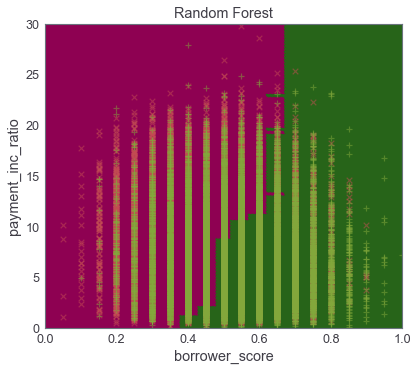

In [168]:
xp, yp = np.linspace(0,1,100), np.linspace(0,30,100)
xv, yv = np.meshgrid(xp, yp)
plt.scatter(xv, yv, c=forest_clf.predict(np.hstack((xv.reshape(-1,1), 
                yv.reshape(-1,1)))).reshape(xv.shape), cmap='PiYG')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='r', marker='x', alpha=0.5, label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='g', marker='+', alpha=0.5, label='Paid off')
plt.grid(False)
plt.title('Random Forest')
plt.xlabel('borrower_score')
plt.ylabel('payment_inc_ratio')
plt.xlim([0,1])
plt.ylim([0,30])

In [169]:
forest_clf.oob_score

False

## Ada Boost

In [170]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=50)
ada_clf.fit(X, y)
print('Acc:', accuracy_score(y, ada_clf.predict(X)))

Acc: 0.629614926558158


(0, 30)

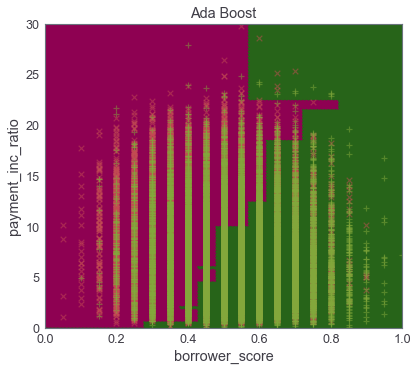

In [171]:
xp, yp = np.linspace(0,1,100), np.linspace(0,30,100)
xv, yv = np.meshgrid(xp, yp)
plt.scatter(xv, yv, c=ada_clf.predict(np.hstack((xv.reshape(-1,1), 
                yv.reshape(-1,1)))).reshape(xv.shape), cmap='PiYG')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='r', marker='x', alpha=0.5, label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='g', marker='+', alpha=0.5, label='Paid off')
plt.grid(False)
plt.title('Ada Boost')
plt.xlabel('borrower_score')
plt.ylabel('payment_inc_ratio')
plt.xlim([0,1])
plt.ylim([0,30])

## Gradient Boost

In [176]:
from sklearn.ensemble import GradientBoostingClassifier

gd_clf = GradientBoostingClassifier(n_estimators=50, subsample=0.63, learning_rate=0.05)
gd_clf.fit(X, y)
print('Acc:', accuracy_score(y, gd_clf.predict(X)))

Acc: 0.6295487627365357


(0, 30)

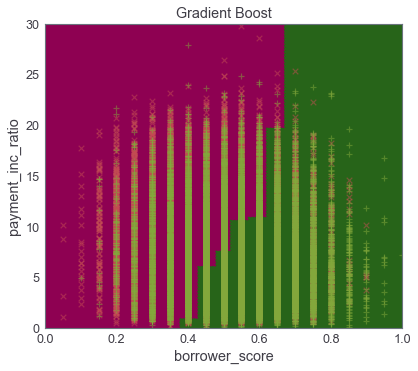

In [177]:
xp, yp = np.linspace(0,1,100), np.linspace(0,30,100)
xv, yv = np.meshgrid(xp, yp)
plt.scatter(xv, yv, c=gd_clf.predict(np.hstack((xv.reshape(-1,1), 
                yv.reshape(-1,1)))).reshape(xv.shape), cmap='PiYG')
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='r', marker='x', alpha=0.5, label='Default')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='g', marker='+', alpha=0.5, label='Paid off')
plt.grid(False)
plt.title('Gradient Boost')
plt.xlabel('borrower_score')
plt.ylabel('payment_inc_ratio')
plt.xlim([0,1])
plt.ylim([0,30])

In [186]:
iter_acc = []
for i, y_pred in enumerate(gd_clf.staged_predict(X)):
    iter_acc.append(accuracy_score(y, y_pred.ravel()))
iter_acc

[0.6262626262626263,
 0.6261744078337965,
 0.6264831723347007,
 0.6264831723347007,
 0.6264831723347007,
 0.6264831723347007,
 0.6264831723347007,
 0.6257774249040624,
 0.6256450972608177,
 0.6263508446914561,
 0.6272991928013762,
 0.6272330289797539,
 0.6272330289797539,
 0.6272330289797539,
 0.6272109743725465,
 0.627188919765339,
 0.627188919765339,
 0.6281372678752591,
 0.6281372678752591,
 0.6281372678752591,
 0.6281372678752591,
 0.6281372678752591,
 0.6281372678752591,
 0.6281372678752591,
 0.6285563054122006,
 0.6284019231617485,
 0.6285563054122006,
 0.6285563054122006,
 0.6290635613779718,
 0.6288650699131049,
 0.6289973975563495,
 0.6289973975563495,
 0.6291958890212165,
 0.6292620528428389,
 0.6297913634158175,
 0.6297913634158175,
 0.6297913634158175,
 0.6297913634158175,
 0.6299898548806846,
 0.6299898548806846,
 0.6299898548806846,
 0.6299898548806846,
 0.6300560187023069,
 0.629614926558158,
 0.629614926558158,
 0.629614926558158,
 0.629614926558158,
 0.629614926558158,

Text(0,0.5,'Accuracy')

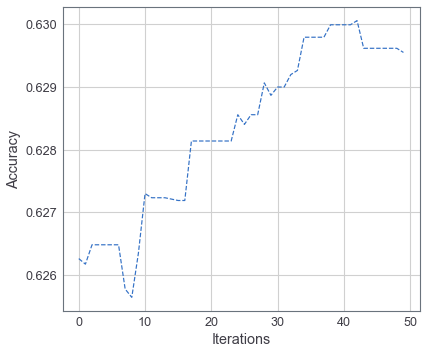

In [188]:
plt.plot(range(len(iter_acc)), iter_acc, 'b--')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')